In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [93]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [94]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
     

In [95]:
df=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')

In [96]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [97]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


<Axes: >

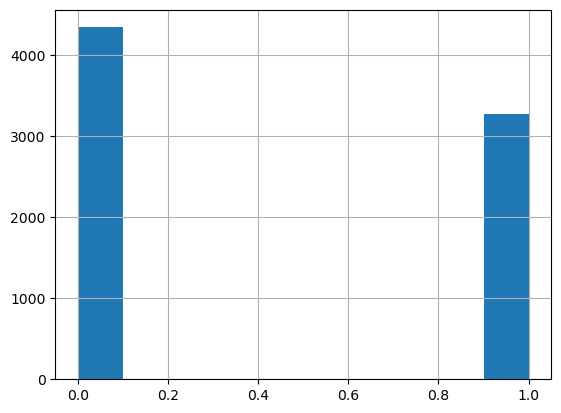

In [98]:
df['target'].hist()

In [99]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [100]:
Y = df['target']
#Y = df['target'].to_numpy()
df_train, df_test, Ytrain, Ytest = train_test_split(
    df['text'], Y, test_size=0.33)

In [101]:
featurizer = TfidfVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

In [102]:
Xtrain

<5100x16455 sparse matrix of type '<class 'numpy.float64'>'
	with 74696 stored elements in Compressed Sparse Row format>

# **Create model using Naive Bayes**

In [103]:
#create model
model=MultinomialNB()
#train model
model.fit(Xtrain,Ytrain)
#print scores
train_acc=model.score(Xtrain, Ytrain)
test_acc=model.score(Xtest, Ytest)
print("train acc:", train_acc)
print("test acc:", test_acc)

train acc: 0.8905882352941177
test acc: 0.7958615200955034


In [104]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("train F1:", f1_score(Ytrain, Ptrain))
print("test F1:", f1_score(Ytest, Ptest))

train F1: 0.8577981651376146
test F1: 0.7228525121555915


In [105]:
Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test = model.predict_proba(Xtest)[:,1]
print("train AUC:", roc_auc_score(Ytrain, Prob_train))
print("test AUC:", roc_auc_score(Ytest, Prob_test))

train AUC: 0.9588490471791885
test AUC: 0.8631484418523789


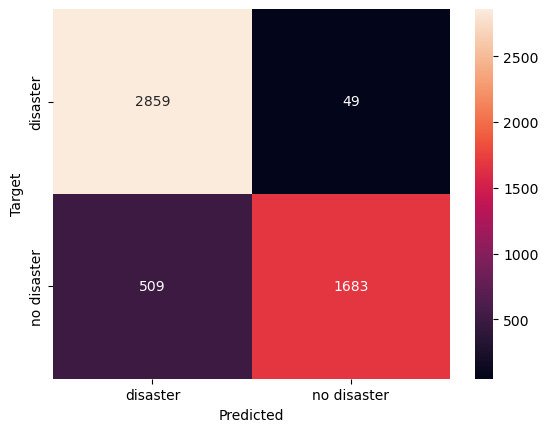

In [106]:
cm=confusion_matrix(Ytrain,Ptrain)
#confusion matrix
def plot_cm(cm):
  classes = ['disaster', 'no disaster']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [107]:
# see what we're getting wrong
X = featurizer.transform(df['text'])
df['predictions'] = model.predict(X)


In [108]:
df

,id,keyword,location,text,target,predictions
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,1


In [109]:
#tweets that are actually about disaster but it is not predicted so

count=0

actually_disaster = df[(df['predictions'] == 0) & (df['target'] == 1)]['text']

for msg in actually_disaster:
  count=count+1
  print(count,msg)

1 Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
2 Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
3 I'm on top of the hill and I can see a fire in the woods...
4 I'm afraid that the tornado is coming to our area...
5 Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding
6 #raining #flooding #Florida #TampaBay #Tampa 18 or 19 days. I've lost count 
7 I was in a horrible car accident this past Sunday. I'm finally able to get around. Thank you GOD??
8 #TruckCrash Overturns On #FortWorth Interstate http://t.co/Rs22LJ4qFp Click here if you've been in a crash&gt;http://t.co/Ld0unIYw4k
9 only had a car for not even a week and got in a fucking car accident .. Mfs can't fucking drive .
10 @AlexAllTimeLow awwww they're on an airplane accident and they're gonna die what a cuties ???? good job!
11 Early wake up call from my sister begging me to come over &amp

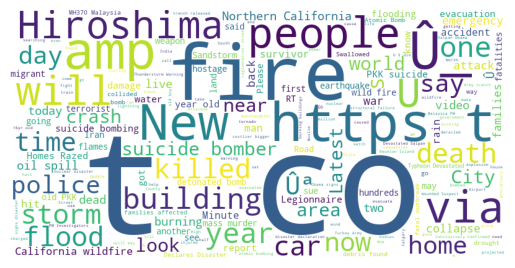

In [110]:
#wordcloud visualisation for disaster tweets

disaster_tweets= df[df['target'] == 1]['text']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(''.join(disaster_tweets))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [115]:
dtest = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
test_tfidf = featurizer.transform(dtest["text"])


In [118]:
preds=model.predict(test_tfidf)
submission = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
submission['target']= preds
submission.to_csv('submission.csv',index=False)